Eigen是可以用来进行线性代数、矩阵、向量操作等运算的C++库，它里面包含了很多算法。  
在用C++写运动控制算法（例如MPC控制算法）的时候,由于算法包括矩阵运算，c++对矩阵的运算支持不是很好，而Eigen是一个简单易用的用于矩阵运算的库。  
可以利用Eigen库进行运算，并且可以直接求解矩阵的逆、转置、伴随矩阵等，不需要利用数组进行计算了，比较方便快捷。


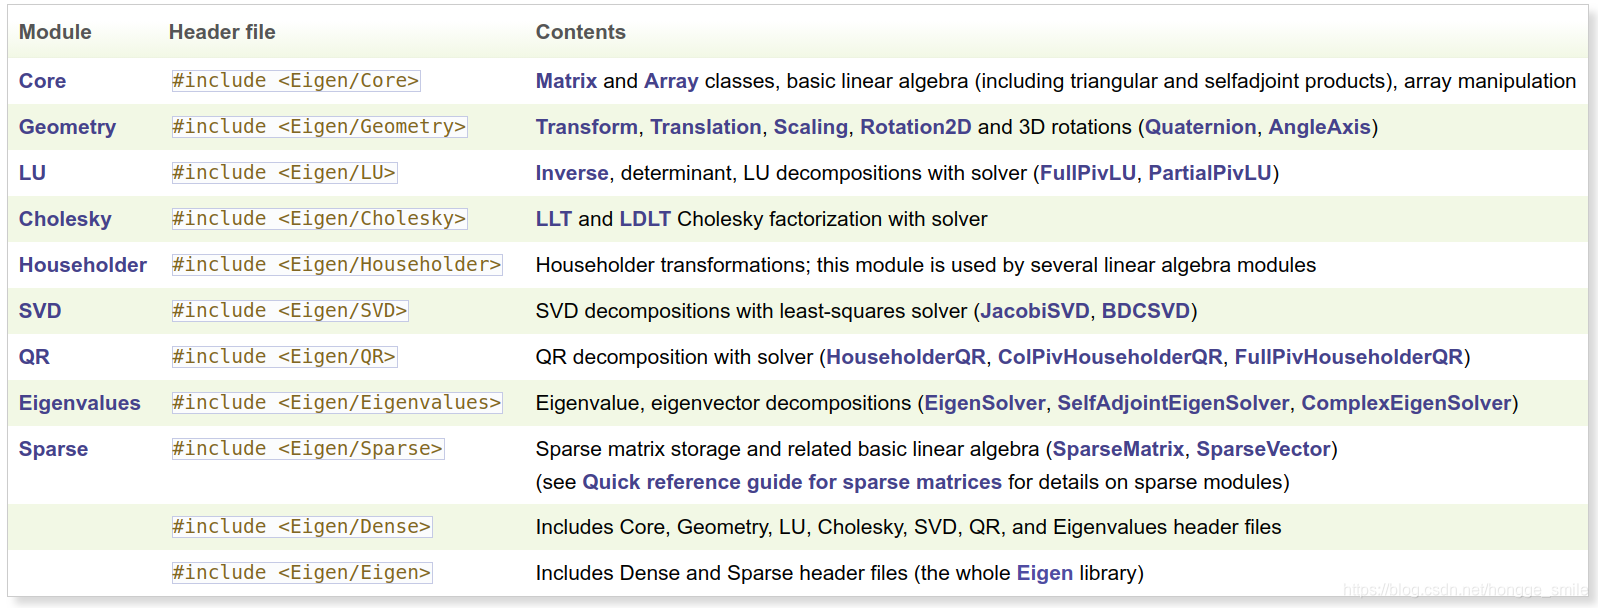

| 模块               | 头文件                     | 内容                                                                 |
|--------------------|---------------------------|----------------------------------------------------------------------|
| 核心               | `#include <Eigen/Core>`   | 矩阵和数组类，基础线性代数（包括三角和自伴随积）、数组操作           |
| 几何               | `#include <Eigen/Geometry>` | 变换、平移、缩放、二维和三维旋转（四元数、轴角）                     |
| LU分解             | `#include <Eigen/LU>`     | 逆、行列式、带求解器的LU分解（FullPivLU, PartialPivLU）             |
| 乔列斯基分解       | `#include <Eigen/Cholesky>` | 带求解器的LLT和LDLT乔列斯基分解                                     |
| 豪斯霍尔德变换     | `#include <Eigen/Householder>` | 豪斯霍尔德变换；此模块被多个线性代数模块使用                         |
| 奇异值分解（SVD）   | `#include <Eigen/SVD>`    | 带最小二乘求解器的SVD分解（JacobiSVD, BDCSVD）                     |
| QR分解             | `#include <Eigen/QR>`     | 带求解器的QR分解（HouseholderQR, ColPivHouseholderQR, FullPivHouseholderQR） |
| 特征值             | `#include <Eigen/Eigenvalues>` | 特征值、特征向量分解（EigenSolver, SelfAdjointEigenSolver, ComplexEigenSolver） |
| 稀疏               | `#include <Eigen/Sparse>` | 稀疏矩阵存储及相关基础线性代数（SparseMatrix, SparseVector）         |
| 密集模块集合       | `#include <Eigen/Dense>`  | 包含Core、Geometry、LU、Cholesky、SVD、QR和Eigenvalues头文件         |
| 完整库             | `#include <Eigen/Eigen>`  | 包含Dense和Sparse头文件（整个Eigen库）                               |

一般为了省事，可以直接导入#include <Eigen/Dense> 或者#include <Eigen/Eigen>

In [ ]:
#include <Eigen/Dense> 
#include <Eigen/Eigen>

1.动态矩阵MatrixXd与固定矩阵Matrix3d、Matrix2d、...  

    动态矩阵的行数和列数在运行时确定，可通过构造函数或resize()函数动态调整
    适合处理未知尺寸的矩阵（如实时计算、动态数据流）

什么时候应该使用固定尺寸（例如Matrix4f），什么时候应该使用动态尺寸（例如MatrixXf）？  
简单的答案是：在可能的地方使用固定尺寸来显示非常小的尺寸，在需要的地方使用动态尺寸来显示较大的尺寸。  
对于小尺寸，尤其是对于小于（大约）16的尺寸，使用固定尺寸对性能有极大的好处，因为它使Eigen避免了动态内存分配并展开了循环。  


In [ ]:
Eigen::MatrixXd m;       // 未初始化
m.resize(3, 4);          // 运行时调整大小为3x4

在Eigen中，所有matrixes和vectors都是Matrix模板类的对象。  
vectors只是matrixes的一种特殊情况，具有1行或1列  

Matrix的三个必需模板参数是：
Matrix<typename Scalar, int RowsAtCompileTime, int ColsAtCompileTime>  
Scalar 是标量类型，即系数的类型。也就是说，如果要使用浮点数矩阵，请在此处选择float。  
有关所有受支持的标量类型的列表以及如何将支持扩展到新类型的信息，请参见标量类型。  
RowsAtCompileTime和ColsAtCompileTime是在编译时已知的矩阵的行数和列数（如果在编译时不知道该数，使用参数Dynamic）。


In [ ]:
typedef Matrix<float, 3, 1> Vector3f;
typedef Matrix<int, 1, 2> RowVector2i;
typedef Matrix<double, Dynamic, Dynamic> MatrixXd;
typedef Matrix<int, Dynamic, 1> VectorXi;

typedef Array<float,Dynamic,Dynamic>       ArrayXXf
typedef Array<double,Dynamic,1>            ArrayXd
typedef Array<int,1,Dynamic>               RowArrayXi
typedef Array<float,3,3>                   Array33f
typedef Array<float,4,1>                   Array4f

说明矩阵类型最后一位代表矩阵内的数据类型f(float),d(double),i(int)  
倒数第二位是维度或形状，X表示动态大小  

Eigen 不仅提供了Matrix和Vector结构，还提供了Array结构。  
区别如下，Matrix和Vector就是线性代数中定义的矩阵和向量，所有的数学运算都和数学上一致。  
但是存在一个问题是数学上的定义并不一定能完全满足现实需求。  
比如，数学上并没有定义一个矩阵和一个标量的加法运算。  
但是如果我们想给一个矩阵的每个元素都加上同一个数，那么这个操作就需要我们自己去实现，这显然并不方便。  
Array 提供了一个Array类，为我们提供了大量的矩阵未定义的操作，且Array和Matrix之间很容易相互转换 ，所以相当于给矩阵提供更多的方法。  
也为使用者的不同需求提供了更多的选择。

In [ ]:
Array<typename Scalar, int RowsAtCompileTime , int ColsAtCompileTime >
//参数的意义和Matrix中参数的意义是相同的。

Array也对常用的情况作了一些类型定义。

In [ ]:
typedef Array<float ,Dynamic,1> ArrayXf;
typedef Array<float,3,1> Array3f;

typedef Array<double,Dynamic ,Dynamic > ArrayXXd;
typedef Array<double ,3,3 > Array33d;

Eigen::Array类重载了+ ， - ，* ,/ 运算符，可以直接用这些运算符对Array对象进行操作。相乘操作是对应的数字相乘，相除是对应的元素相除。

In [ ]:
ArrayXXf a(3, 3);
ArrayXXf b(3, 3);
a << 1, 2, 3,
        4, 5, 6,
        7, 8, 9;
b << 1, 2, 3,
        1, 2, 3,
        1, 2, 3;
cout << "a + b = " << endl << a + b << endl << endl;
cout << "a - 2 = " << endl << a - 2 << endl;
cout << "a * b = " << endl << a * b << endl;
cout << "a / b = " << endl << a / b << endl;

Array 还定义了 绝对值 abs() ，开平方根sqrt() , 以及找对应元素最小值操作 min() ;

In [ ]:
ArrayXXf a = ArrayXXf::Random(2,2);
// 初始化2X2  Array
a *= 2;
cout << "a = " << endl << a << endl;
cout << "a.abs() = " << endl << a.abs() << endl;
cout << "a.abs().sqrt() =" << endl << a.abs().sqrt() << endl;
cout << "a.min(a.abs().sqrt()) = " << endl << a.min(a.abs().sqrt()) << endl;

支持与原生数组的零拷贝交互（需通过Eigen::Map实现）  

In [ ]:
// 原生数组初始化
double rawData[] = {1,2,3,4,5,6};

// 零拷贝映射为3x2矩阵
Eigen::Map<Eigen::MatrixXd> matMap(rawData, 3, 2);

// 直接操作映射矩阵同时会修改原生数组第一个元素
matMap(0,0) = 10;  

// 验证数据共享
for(auto val : rawData) std::cout << val << " ";  

Eigen提供了一种逗号初始化器语法，该语法使用户可以轻松设置矩阵，向量或数组的所有系数。  
只需列出系数，从左上角开始，从左到右，从上到下移动。需要预先指定对象的大小。  
如果列出的系数太少或太多，编译器就会报错。

此外，初始化列表的元素本身可以是向量或矩阵。通常的用途是将向量或矩阵连接在一起。  
例如，这是如何将两个行向量连接在一起。请记住，必须先设置大小，然后才能使用逗号初始化程序。

In [ ]:
Eigen::MatrixXd A(2,2), B(2,2);

// 设置矩阵的元素
B << 5,6, 7,8;

//矩阵元素的访问
A(0, 0) = 1;
A(0, 1) = 2;
A(1, 0) = 3; 
A(1, 1) = 4;


RowVectorXd vec1(3);
vec1 << 1, 2, 3;

RowVectorXd vec2(4);
vec2 << 1, 4, 9, 16;
 
RowVectorXd joined(7);
joined << vec1, vec2;

一些常用的初始化方法

In [ ]:
MatrixXd m0 = MatrixXd::Random(3, 3);           //随机初始化初始化的值在[-1,1]区间内,矩阵大小3X3
MatrixXd m1 = MatrixXd::Constant(3, 3, 2.4);    //常量值初始化,矩阵里面的值全部为2.4 ,三个参数分别代表：行数，列数，常量值
Matrix2d m2 = Matrix2d::Zero();                 //零初始化.矩阵里面的值全部为0
Matrix3d m3 = Matrix3d::Ones();                 // 矩阵里面的值全部初始化为1
Matrix4d m4 = Matrix4d::Identity();             //初始化为单位矩阵

矩阵的当前大小可以通过rows（），cols（）和size（）检索。  
这些方法分别返回行数，列数和系数数。调整动态大小矩阵的大小是通过resize（）方法完成的。  
动态矩阵可以随意调整矩阵大小，固定尺寸的矩阵无法调整大小。

In [ ]:
MatrixXd m(2, 5);
m.resize(4, 3);
std::cout << "The matrix m is of size "<< m.rows() << "x" << m.cols() << std::endl;
std::cout << "It has " << m.size() << " coefficients" << std::endl;

VectorXd v(2);
v.resize(5);
std::cout << "The vector v is of size " << v.size() << std::endl;
std::cout << "As a matrix, v is of size "<< v.rows() << "x" << v.cols() << std::endl;

支持完整的矩阵运算：加法、乘法、转置、逆矩阵等  

In [ ]:
// 基础运算
std::cout << "A + B:\n" << A + B << "\n\n";
std::cout << "A * 3:\n" << A * 3 << "\n\n";

// 矩阵乘法
std::cout << "A * B:\n" << A * B << "\n\n";

// 转置与逆矩阵
std::cout << "A^T:\n" << A.transpose() << "\n\n";
std::cout << "A^-1:\n" << A.inverse() << "\n\n";
std::cout << "共轭A^cj:\n" << m.conjugate() << std::endl << std::endl;
std::cout << "伴随A^*:\n" << m.adjoint() << std::endl << std::endl;

// 点积与叉积
Eigen::VectorXd v1(3), v2(3);
v1 << 1,2,3; v2 << 4,5,6;
std::cout << "Dot Product: " << v1.dot(v2) << "\n";
std::cout << "Cross Product:\n" << v1.cross(v2) << "\n";
//记住叉积仅仅用于尺寸为3的向量！点积可以用于任意尺寸的向量，当使用复数时， 
// Eigen的点积操作是第一个变量为共轭线性的，第二个为线性的。

矩阵的基础的算术(求和,平均值等)

In [ ]:
cout << "Here is mat.sum():       " << mat.sum()       << endl;
cout << "Here is mat.prod():      " << mat.prod()      << endl;
cout << "Here is mat.mean():      " << mat.mean()      << endl;
cout << "Here is mat.minCoeff():  " << mat.minCoeff()  << endl;
cout << "Here is mat.maxCoeff():  " << mat.maxCoeff()  << endl;
cout << "Here is mat.trace():     " << mat.trace()     << endl;
cout << "Here is mat.trace():     " << mat.diagonal()  << endl;

minCoeff和maxCoeff函数也可以返回相应的元素的位置信息

In [ ]:
Matrix3f m = Matrix3f::Random();
  std::ptrdiff_t i, j;
  float minOfM = m.minCoeff(&i,&j);
  cout << "Here is the matrix m:\n" << m << endl;
  cout << "Its minimum coefficient (" << minOfM 
       << ") is at position (" << i << "," << j << ")\n\n";
  RowVector4i v = RowVector4i::Random();
  int maxOfV = v.maxCoeff(&i);
  cout << "Here is the vector v: " << v << endl;
  cout << "Its maximum coefficient (" << maxOfV 
       << ") is at position " << i << endl;

块操作用于提取矩阵或数组的矩形子区域，支持动态和固定尺寸两种模式  

参数说明：

    i, j：子矩阵左上角的行、列索引（从0开始）

    p, q：子矩阵的行数和列数

返回值：子矩阵的视图（视图可修改原数据）


索引从0开始。两个版本都可用于固定尺寸或者动态尺寸的矩阵和数组。  
这两个表达式语义上相同，唯一的区别是如果块的尺寸比较小的话固定尺寸版本的块操作运行更快，但是需要在编译阶段知道大小。

In [ ]:
Eigen::MatrixXd mat(4,4);
mat << 1,2,3,4,
        5,6,7,8,
        9,10,11,12,
        13,14,15,16;
        
// 动态尺寸块（运行时确定大小）
Eigen::MatrixXd subMat = mat.block(i, j, p, q);  // 从(i,j)开始，取p行q列

// 固定尺寸块（编译时确定大小）
Eigen::MatrixXd fixedSubMat = mat.block<p, q>(i, j);  // 显式指定块大小

角块操作

In [ ]:
// 左上角2x2块
Eigen::MatrixXd topLeft = mat.topLeftCorner(2,2);  // [[1,2],[5,6]]

// 右下角3x1块
Eigen::MatrixXd bottomRight = mat.bottomRightCorner(3,1);  // [[12],[16]]

| 块操作                       | 构建动态大小块表达式的版本                    | 构建固定大小块表达式的版本                  |
|----------------------------|------------------------------------------|----------------------------------------|
| Top-left p by q block *    | `matrix.topLeftCorner(p,q);`             | `matrix.topLeftCorner<p,q>();`         |
| 左上角 p×q 块 *            |                                          |                                        |
| Bottom-left p by q block * | `matrix.bottomLeftCorner(p,q);`          | `matrix.bottomLeftCorner<p,q>();`      |
| 左下角 p×q 块 *            |                                          |                                        |
| Top-right p by q block *   | `matrix.topRightCorner(p,q);`            | `matrix.topRightCorner<p,q>();`        |
| 右上角 p×q 块 *            |                                          |                                        |
| Bottom-right p by q block *| `matrix.bottomRightCorner(p,q);`         | `matrix.bottomRightCorner<p,q>();`     |
| 右下角 p×q 块 *            |                                          |                                        |
| Block containing the first q rows * | `matrix.topRows(q);`             | `matrix.topRows<q>();`                 |
| 包含前 q 行的块 *          |                                          |                                        |
| Block containing the last q rows * | `matrix.bottomRows(q);`          | `matrix.bottomRows<q>();`              |
| 包含后 q 行的块 *          |                                          |                                        |
| Block containing the first p columns * | `matrix.leftCols(p);`        | `matrix.leftCols<p>();`                |
| 包含前 p 列的块 *          |                                          |                                        |
| Block containing the last q columns * | `matrix.rightCols(q);`       | `matrix.rightCols<q>();`               |
| 包含后 q 列的块 *          |                                          |                                        |

对于向量的块操作  

| 块操作                              | 构建动态大小块表达式的版本      | 构建固定大小块表达式的版本    |
|----------------------------------|----------------------------|--------------------------|
| 包含前 n 个元素的块 *             | `vector.head(n);`          | `vector.head<n>();`      |
| Block containing the first n elements * |                            |                          | （同上，英文保留供对照）
| 包含后 n 个元素的块 *             | `vector.tail(n);`          | `vector.tail<n>();`      |
| Block containing the last n elements * |                            |                          | （同上，英文保留供对照）
| 包含从位置 i 开始的 n 个元素的块 * | `vector.segment(i, n);`    | `vector.segment<n>(i);`  |
| Block containing n elements, starting at position i * |    |                          | （同上，英文保留供对照）

切片操作用于提取矩阵的单行或单列，是块操作的特殊形式  
索引规则：行/列索引从0开始  
返回类型：RowVectorXd（行）或VectorXd（列）  
直接映射到原始数据指针，无内存拷贝  
与块操作的关系：row(i)等效于block(i, 0, 1, cols())，col(j)等效于block(0, j, rows(), 1)

In [ ]:
// 提取第i行（返回行向量）
Eigen::RowVectorXd row = mat.row(i);
row==mat.block(i, 0, 1, mat.cols());

// 提取第j列（返回列向量）
Eigen::VectorXd col = mat.col(j);
col==mat.block(0, j, mat.rows(), 1);

与固定矩阵混合运算

In [ ]:
Eigen::MatrixXd A = Eigen::MatrixXd::Random(5,5);
Eigen::Matrix3d B = Eigen::Matrix3d::Identity();
Eigen::MatrixXd C = A.block(0,0,3,3) * B; 

范数计算

向量的平方范数由squaredNorm()获得，等价于向量对自身做点积，也等同于所有元素额平方和。  
Eigen也提供了norm()范数，返回的是squaredNorm()的根。  
这些操作也适用于矩阵。如果想使用其他元素级的范数，使用lpNorm()方法，当求无穷范数时，模板参数p可以取特殊值Infinity，得到的是所有元素的最大绝对值。


In [ ]:
VectorXf v(2);
MatrixXf m(2, 2), n(2, 2);

v << -1, 2;

m << 1, -2, -3, 4;
cout << "v.squaredNorm() = " << v.squaredNorm() << endl;
cout << "v.norm() = " << v.norm() << endl;
cout << "v.lpNorm<1>() = " << v.lpNorm<1>() << endl;
cout << "v.lpNorm<Infinity>() = " << v.lpNorm<Infinity>() << endl;
cout << endl;
cout << "m.squaredNorm() = " << m.squaredNorm() << endl;
cout << "m.norm() = " << m.norm() << endl;
cout << "m.lpNorm<1>() = " << m.lpNorm<1>() << endl;
cout << "m.lpNorm<Infinity>() = " << m.lpNorm<Infinity>() << endl;

矩阵的1范数和无穷范数也可以用下面的方法计算

In [ ]:
MatrixXf m(2,2);
m << 1,-2,
    -3,4;
cout << "1-norm(m)     = " << m.cwiseAbs().colwise().sum().maxCoeff()
    << " == "             << m.colwise().lpNorm<1>().maxCoeff() << endl;
cout << "infty-norm(m) = " << m.cwiseAbs().rowwise().sum().maxCoeff()
    << " == "             << m.rowwise().lpNorm<1>().maxCoeff() << endl;

布尔规约  

如下的操作得到的是布尔值  
all()返回真，如果矩阵或数组的所有元素为真  
any()返回真，如果矩阵或数组至少有一个元素为真  
count()返回元素为真的个数  

In [ ]:
ArrayXXf a(2,2);

a << 1,2,
    3,4;
cout << "(a > 0).all()   = " << (a > 0).all() << endl;
cout << "(a > 0).any()   = " << (a > 0).any() << endl;
cout << "(a > 0).count() = " << (a > 0).count() << endl;
cout << endl;
cout << "(a > 2).all()   = " << (a > 2).all() << endl;
cout << "(a > 2).any()   = " << (a > 2).any() << endl;
cout << "(a > 2).count() = " << (a > 2).count() << endl;


部分规约

部分规约指的是对矩阵或数组按行或列进行的操作，对每一列或者行进行规约操作时得到的是一个列或者行向量。  
如下例子得到矩阵每一列的最大值并存入一个行向量中

使用部分规约操作得到的结果去做其他的操作也是可以的，如下例子用于得到矩阵中元素和最大的一列

mat.colwise()是 Eigen 库中一个非常实用的功能，它代表了一种按列处理的模式。
简单来说，它允许你对矩阵的每一列分别执行相同的操作(可以看做一个自动遍历操作的迭代器)。  

返回值类型：mat.colwise()本身并不立即进行计算，它返回一个特殊的列表达式对象。  
真正的计算发生在你将这个表达式赋值给某个变量或用于其他计算时。  
这种设计是Eigen的“延迟计算”机制，有助于优化性能。  

与 .array()的转换：当你需要进行更复杂的逐元素运算（如平方、开方、三角函数等）时，通常需要先将矩阵转换为数组形式：mat.colwise().sum().array()。  
性能优势：使用 colwise()进行规约操作比用循环逐列处理要高效得多，因为Eigen在底层进行了优化。  


In [ ]:
Eigen::MatrixXf mat(2,4);
mat << 1, 2, 6, 9,
        3, 1, 7, 2;

std::cout << "Column's maximum: " << std::endl
<< mat.colwise().maxCoeff() << std::endl;

std::cout << "Row's maximum: " << std::endl
<< mat.rowwise().maxCoeff() << std::endl;

MatrixXf::Index   maxIndex;
float maxNorm = mat.colwise().sum().maxCoeff(&maxIndex);

std::cout << "Maximum sum at position " << maxIndex << std::endl;
std::cout << "The corresponding vector is: " << std::endl;
std::cout << mat.col( maxIndex ) << std::endl;
std::cout << "And its sum is is: " << maxNorm << std::endl;


广播机制

广播的概念类似于部分规约，不同之处在于广播通过对向量在一个方向上的复制，将向量解释成矩阵。如下例子将一个列向量加到矩阵的每一列中  

可以将mat.colwise()+=v理解成两种等价的方式，它将列向量加到矩阵的每一列中；或者将列向量复制4次的得到一个2x4的矩阵，之后进行矩阵的相加运算：  

+=、+和-运算符也可以按列或行操作。在数组中也可以用*=、/=、和/运算符执行元素级的按行或列乘除运算。  
但不能用在矩阵上，如果想用v(0)乘以矩阵的第0列，v(1)乘以矩阵的第1列…使用mat = mat*v.asDiagonal()。


In [ ]:
Eigen::MatrixXf mat(2,4);
Eigen::VectorXf v(2);

mat << 1, 2, 6, 9,
        3, 1, 7, 2;
        
v << 0,
    1;
    
//add v to each column of m
mat.colwise() += v;

std::cout << "Broadcasting result: " << std::endl;
std::cout << mat << std::endl;

其他矩阵数据类型  
### 一、矩阵与向量类型

| 类型              | 描述                        | 示例                      |
|-------------------|----------------------------|--------------------------|
| **动态矩阵**      |                            |                          |
| MatrixXd          | 动态大小双精度矩阵         | `MatrixXd m(3,4);`      |
| VectorXd          | 动态大小双精度列向量       | `VectorXd v(5);`        |
| RowVectorXd       | 动态大小双精度行向量       | `RowVectorXd rv(5);`    |
| **固定大小矩阵**  |                            |                          |
| Matrix3d          | 3x3双精度矩阵              | `Matrix3d m;`           |
| Vector4f          | 4维单精度列向量            | `Vector4f v;`           |
| RowVector2i       | 2维整数行向量              | `RowVector2i rv;`       |
| **稀疏矩阵**      |                            |                          |
| SparseMatrix<double> | 列压缩存储的稀疏矩阵     | `SparseMatrix<double> A(1000,1000);` |
| SparseVector<float>  | 稀疏向量                 | `SparseVector<float> sv(500);` |

### 二、数值计算专用类型

| 类型              | 描述                        | 示例                      |
|-------------------|----------------------------|--------------------------|
| **数组类型**      |                            |                          |
| ArrayXd           | 动态大小双精度数组         | `ArrayXd arr(10);`      |
| ArrayXf           | 动态大小单精度数组         | `ArrayXf arr;`          |
| Array3d           | 3x3双精度数组              | `Array3d arr3d;`        |
| **四元数类型**    |                            |                          |
| Quaterniond       | 双精度四元数（3D旋转）     | `Quaterniond q;`        |
| Quaternionf       | 单精度四元数               | `Quaternionf qf;`       |

### 三、几何变换类型

| 类型              | 描述                        | 示例                      |
|-------------------|----------------------------|--------------------------|
| **仿射变换**      |                            |                          |
| Transform3d       | 3D仿射变换（4x4矩阵）      | `Transform3d t;`        |
| AngleAxisd        | 轴角表示的3D旋转           | `AngleAxisd aa(M_PI/4, Vector3d::UnitZ());` |

### 四、特殊矩阵类型

| 类型              | 描述                        | 示例                      |
|-------------------|----------------------------|--------------------------|
| **分块矩阵与视图**|                            |                          |
| MatrixXd::Block   | 矩阵子块视图               | `mat.block(0,0,3,3)`    |
| MatrixXd::RowXpr  | 行表达式视图               | `mat.row(2)`            |
| **压缩存储矩阵**  |                            |                          |
| SparseMatrixLLT   | 稀疏Cholesky分解结果       | `SparseMatrixLLT<double> solver;` |

### 五、类型后缀与模板参数

| 后缀              | 含义                        | 示例                      |
|-------------------|----------------------------|--------------------------|
| **维度标识符**    |                            |                          |
| X                 | 动态维度                   | `MatrixXd`              |
| d                 | 双精度                     | `Matrix3d`              |
| f                 | 单精度                     | `Vector4f`              |
| i                 | 整数                       | `MatrixXi`              |
| **存储顺序标识符**|                            |                          |
| ColMajor          | 列优先存储（默认）         | `Matrix<float,3,3,ColMajor>` |
| RowMajor          | 行优先存储                 | `Matrix<double,2,2,RowMajor>` |